In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
X = df.drop(["target"],axis = 1)
Y  = df["target"]
#X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 2)

In [9]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)

In [10]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
169   53    1   0       140   203    1        0      155      1      3.1   
184   50    1   0       150   243    0        0      128      0      2.6   
28    65    0   2       140   417    1        0      157      0      0.8   
64    58    1   2       140   211    1        0      165      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
89    58    0   0       100   248    0        0      122      0      1.0   
99    53    1   2       130   246    1        0      173      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
256   58    1   0       128   259    0        0      130      1      3.0   
159   56    1   1       130   221    0        0      163      0      0.0   

     slope  ca  thal  
169      0   0     3  
184      1   0     3  
28       2   1    

In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 2)

In [12]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
237   60    1   0       140   293    0        0      170      0      1.2   
106   69    1   3       160   234    1        0      131      0      0.1   
10    54    1   0       140   239    0        1      160      0      1.2   
153   66    0   2       146   278    0        0      152      0      0.0   
77    59    1   1       140   221    0        1      164      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
75    55    0   1       135   250    0        0      161      0      1.4   
22    42    1   0       140   226    0        1      178      0      0.0   
72    29    1   1       130   204    0        0      202      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
168   63    1   0       130   254    0        0      147      0      1.4   

     slope  ca  thal  
237      1   2     3  
106      1   1     2  
10       2   0    

In [13]:
print(X_train.shape)

(242, 13)


# Logistic Regression

In [14]:
lr_scores  = []
for k in range(1,40):
    lr = LogisticRegression(random_state = k)
    lr.fit(X_train , Y_train)
    ypred= lr.predict(X_test)
    lr_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(lr_scores)+1}")

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best choice of k:1


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [15]:
lr = LogisticRegression(random_state = 1)
lr.fit(X_train , Y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
ypred= lr.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print("Confusion matrix:\n" , cm )

Confusion matrix:
 [[26  6]
 [ 0 29]]


In [18]:
import seaborn as sns

In [19]:
from sklearn.metrics import classification_report

In [20]:
from sklearn.metrics import accuracy_score

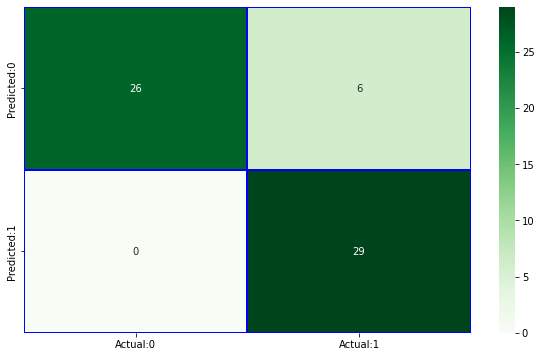

In [21]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Actual:0', 'Actual:1'], 
                           index =['Predicted:0', 'Predicted:1'])      
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [22]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



In [23]:
tr_score = lr.score(X_train , Y_train)
te_score = lr.score(X_test , Y_test)
print(f"Training accuracy :{tr_score}\n Testing accuracy : {te_score}")

Training accuracy :0.8305785123966942
 Testing accuracy : 0.9016393442622951


In [24]:
print("Accuracy :" , accuracy_score(Y_test , ypred))

Accuracy : 0.9016393442622951


# Decision Tree

In [25]:
dt_scores  = []
for k in range(1,40):
    dt = DecisionTreeClassifier(random_state = k)
    dt.fit(X_train , Y_train)
    ypred = dt.predict(X_test)
    dt_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(dt_scores)+1}")

Best choice of k:2


In [26]:
dt = DecisionTreeClassifier(random_state = 2)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(random_state=2)

In [27]:
ypred1iii = dt.predict(X_test)
cm1iii = confusion_matrix(Y_test,ypred1iii)
print("Confusion matrix:\n" , cm1iii )

Confusion matrix:
 [[25  7]
 [ 1 28]]


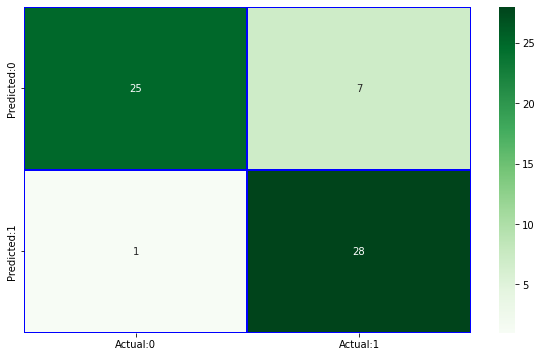

In [28]:
conf_matrix = pd.DataFrame(data = cm1iii,  
                           columns = ['Actual:0', 'Actual:1'],  #'Predicted:0', 'Predicted:1'
                           index =['Predicted:0', 'Predicted:1'])      #'Actual:0', 'Actual:1'
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [29]:
print(classification_report(Y_test,ypred1iii))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [30]:
tr_score1iii = dt.score(X_train , Y_train)
te_score1iii = dt.score(X_test , Y_test)
print(f"Training accuracy :{tr_score1iii}\n Testing accuracy : {te_score1iii}")
print("Accuracy :" , accuracy_score(Y_test , ypred1iii))

Training accuracy :1.0
 Testing accuracy : 0.8688524590163934
Accuracy : 0.8688524590163934


# Random Forest

In [31]:
rf_scores  = []
for k in range(1,40):
    rf = RandomForestClassifier(random_state = k)
    rf.fit(X_train , Y_train)
    ypred = rf.predict(X_test)
    rf_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(rf_scores)+1}")

Best choice of k:4


In [32]:
rf2 =  RandomForestClassifier(random_state = 4 )
rf2.fit(X_train , Y_train)

RandomForestClassifier(random_state=4)

In [33]:
ypred1iv = rf2.predict(X_test)
cm1iv = confusion_matrix(Y_test,ypred1iv)
print("Confusion matrix:\n" , cm1iv )

Confusion matrix:
 [[27  5]
 [ 0 29]]


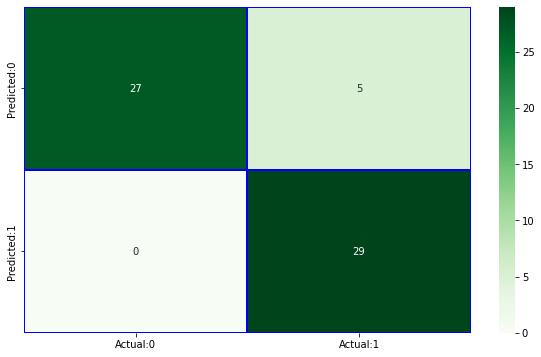

In [34]:
conf_matrix = pd.DataFrame(data = cm1iv,  
                           columns = ['Actual:0', 'Actual:1'],  
                           index =['Predicted:0', 'Predicted:1'])     
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [35]:
print(classification_report(Y_test,ypred1iv))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [36]:
tr_score1iv = rf2.score(X_train , Y_train)
te_score1iv = rf2.score(X_test , Y_test)
print(f"Training accuracy :{tr_score1iv}\n Testing accuracy : {te_score1iv}")
print("Accuracy :" , accuracy_score(Y_test , ypred1iv))

Training accuracy :1.0
 Testing accuracy : 0.9180327868852459
Accuracy : 0.9180327868852459


# ADA

In [37]:
from sklearn.ensemble import  AdaBoostClassifier

In [38]:
ad_scores  = []
for k in range(1,40):
    ad = AdaBoostClassifier(random_state =k)
    ad.fit(X_train , Y_train)
    ypred = ad.predict(X_test)
    ad_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(ad_scores)+1}")

Best choice of k:1


In [39]:
ad = AdaBoostClassifier(random_state =1)
ad.fit(X_train , Y_train)

AdaBoostClassifier(random_state=1)

In [40]:
ypred2ii = ad.predict(X_test)
cm2ii = confusion_matrix(Y_test,ypred2ii)
print("Confusion matrix:\n" , cm2ii )

Confusion matrix:
 [[25  7]
 [ 0 29]]


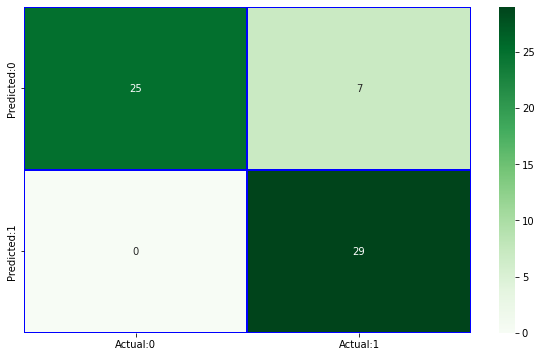

In [41]:
conf_matrix = pd.DataFrame(data = cm2ii,  
                           columns = ['Actual:0', 'Actual:1'],  
                           index =['Predicted:0', 'Predicted:1'])    
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [42]:
print(classification_report(Y_test,ypred2ii))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        32
           1       0.81      1.00      0.89        29

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61



In [43]:
tr_score2ii = ad.score(X_train , Y_train)
te_score2ii = ad.score(X_test , Y_test)
print(f"Training accuracy :{tr_score2ii}\n Testing accuracy : {te_score2ii}")
print("Accuracy :" , accuracy_score(Y_test , ypred2ii))

Training accuracy :0.9049586776859504
 Testing accuracy : 0.8852459016393442
Accuracy : 0.8852459016393442


# XGB

In [44]:
from xgboost import XGBClassifier

In [45]:
xg_scores  = []
for k in range(1,40):
    xg = XGBClassifier(random_state = k)
    xg.fit(X_train , Y_train)
    ypred = xg.predict(X_test)
    xg_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(xg_scores)+1}")

Best choice of k:1


In [46]:
xg = XGBClassifier(random_state = 1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [47]:
ypred2iii = xg.predict(X_test)
cm2iii = confusion_matrix(Y_test,ypred2iii)
print("Confusion matrix:\n" , cm2iii )

Confusion matrix:
 [[23  9]
 [ 0 29]]


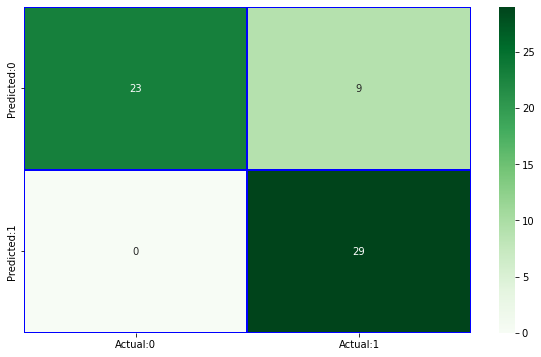

In [48]:
conf_matrix = pd.DataFrame(data = cm2iii,  
                           columns = ['Actual:0', 'Actual:1'],  
                           index =['Predicted:0', 'Predicted:1'])      
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [49]:
print(classification_report(Y_test,ypred2iii))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        32
           1       0.76      1.00      0.87        29

    accuracy                           0.85        61
   macro avg       0.88      0.86      0.85        61
weighted avg       0.89      0.85      0.85        61



In [50]:
tr_score2iii = xg.score(X_train , Y_train)
te_score2iii = xg.score(X_test , Y_test)
print(f"Training accuracy :{tr_score2iii}\n Testing accuracy : {te_score2iii}")
print("Accuracy :" , accuracy_score(Y_test , ypred2iii))

Training accuracy :1.0
 Testing accuracy : 0.8524590163934426
Accuracy : 0.8524590163934426


# Stochastic Gradient Descent

In [51]:
from sklearn.linear_model import  SGDClassifier

In [52]:
sg_scores  = []
for k in range(1,40):
    sg = SGDClassifier(random_state =k)
    sg.fit(X_train , Y_train)
    ypred = sg.predict(X_test)
    sg_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(sg_scores)+1}")

Best choice of k:16


In [53]:
sg = SGDClassifier(random_state =16)
sg.fit(X_train , Y_train)

SGDClassifier(random_state=16)

In [54]:
ypred3iii= sg.predict(X_test)
cm3iii = confusion_matrix(Y_test,ypred3iii)
print("Confusion matrix:\n" , cm3iii )

Confusion matrix:
 [[29  3]
 [ 7 22]]


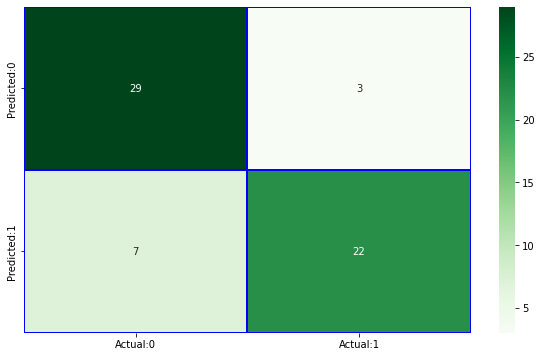

In [55]:
conf_matrix = pd.DataFrame(data = cm3iii,  
                           columns = ['Actual:0', 'Actual:1'],  
                           index =['Predicted:0', 'Predicted:1'])     
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [56]:
print(classification_report(Y_test,ypred3iii))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.76      0.81        29

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [57]:
tr_score3iii = sg.score(X_train , Y_train)
te_score3iii = sg.score(X_test , Y_test)
print(f"Training accuracy :{tr_score3iii}\n Testing accuracy : {te_score3iii}")
print("Accuracy :" , accuracy_score(Y_test , ypred3iii))

Training accuracy :0.6570247933884298
 Testing accuracy : 0.8360655737704918
Accuracy : 0.8360655737704918


# SVM

In [58]:
sv_scores  = []
for k in range(1,100):
    sv = SVC(random_state = k)
    sv.fit(X_train , Y_train)
    ypred = sv.predict(X_test)
    sv_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(sv_scores)+1}")

Best choice of k:1


In [59]:
sv = SVC(random_state = 1)
sv.fit(X_train , Y_train)

SVC(random_state=1)

In [60]:
ypred2i = sv.predict(X_test)
cm2i = confusion_matrix(Y_test,ypred2i)
print("Confusion matrix:\n" , cm2i )

Confusion matrix:
 [[14 18]
 [ 2 27]]


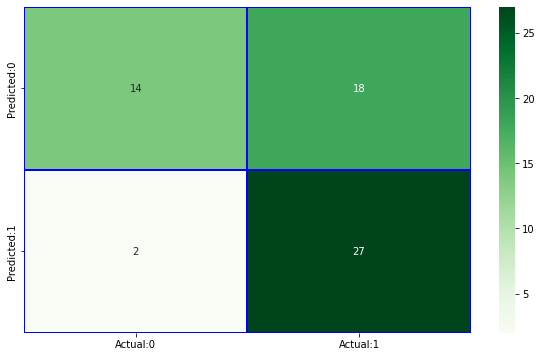

In [61]:
conf_matrix = pd.DataFrame(data = cm2i ,  
                           columns = ['Actual:0', 'Actual:1'],  #'Predicted:0', 'Predicted:1'
                           index =['Predicted:0', 'Predicted:1'])      #'Actual:0', 'Actual:1'
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [62]:
print(classification_report(Y_test,ypred2i))

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        32
           1       0.60      0.93      0.73        29

    accuracy                           0.67        61
   macro avg       0.74      0.68      0.66        61
weighted avg       0.74      0.67      0.65        61



In [63]:
tr_score2i = sv.score(X_train , Y_train)
te_score2i = sv.score(X_test , Y_test)
print(f"Training accuracy :{tr_score2i}\n Testing accuracy : {te_score2i}")
print("Accuracy :" , accuracy_score(Y_test , ypred2i))

Training accuracy :0.640495867768595
 Testing accuracy : 0.6721311475409836
Accuracy : 0.6721311475409836


# KNN

In [64]:
knn_scores  = []
for k in range(1,100):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train , Y_train)
    ypred = kn.predict(X_test)
    knn_scores.append(accuracy_score(Y_test , ypred))
print(f"Best choice of k:{np.argmax(knn_scores)+1}")

Best choice of k:20


In [65]:
kn = KNeighborsClassifier(n_neighbors = 20)
kn.fit(X_train , Y_train)
ypred1ii = kn.predict(X_test)

In [66]:
cm1ii = confusion_matrix(Y_test,ypred1ii)
print("Confusion matrix:\n" , cm1ii )

Confusion matrix:
 [[22 10]
 [ 4 25]]


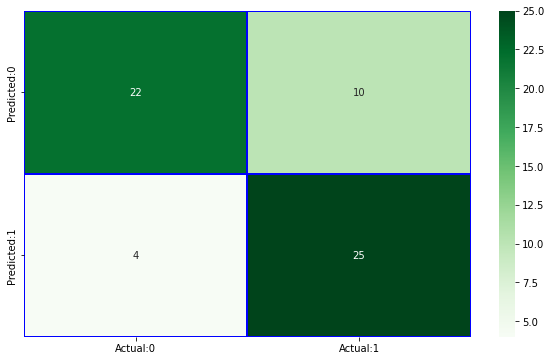

In [67]:
conf_matrix = pd.DataFrame(data = cm1ii,  
                           columns = ['Actual:0', 'Actual:1'],  #'Predicted:0', 'Predicted:1'
                           index =['Predicted:0', 'Predicted:1'])      #'Actual:0', 'Actual:1'
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show()

In [68]:
print(classification_report(Y_test,ypred1ii))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [69]:
tr_scoreii = kn.score(X_train , Y_train)
te_scoreii = kn.score(X_test , Y_test)
print(f"Training accuracy :{tr_scoreii}\n Testing accuracy : {te_scoreii}")
print("Accuracy :" , accuracy_score(Y_test , ypred1ii))

Training accuracy :0.6735537190082644
 Testing accuracy : 0.7704918032786885
Accuracy : 0.7704918032786885


In [70]:
input_data = (48,0,2,130,275,0,1,139,0,0.2,2,0,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rf2.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(rf2, open('rf2.pkl','wb'))